In [60]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import  learning_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

import torch
from torch_geometric.data import Data

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [61]:
data = pd.read_csv('./Data/agg_final_data.csv')

In [62]:
data.shape

(63864, 12)

In [63]:
data

,"('amount', 'mean')",client_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
0,9.948950e+05,1,44.0,4886.0,0,0,1,0,0,1,0.0,0.0
1,6.072894e+03,94,39.0,1510.0,1,0,0,0,0,1,0.0,0.0
2,2.787111e+05,114,60.0,2826.0,1,0,0,0,0,1,0.0,0.0
3,5.241910e+05,129,44.0,5479.0,1,0,0,0,1,0,0.0,0.0
4,4.365950e+04,166,32.0,608.0,0,0,1,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63859,2.565470e+04,1920916,47.0,3463.0,0,0,1,0,0,1,0.0,0.0
63860,1.027485e+06,1920997,53.0,3429.0,1,0,0,0,1,0,0.0,0.0
63861,4.958946e+04,1921028,30.0,2806.0,0,0,1,0,0,1,0.0,0.0
63862,9.089023e+04,1921064,33.0,3457.0,0,1,0,0,0,1,0.0,0.0


In [64]:
data_X = data.drop(['Fraud_presence', 'Reject_presence', 'client_inn'], axis=1)

In [65]:
data_X

,"('amount', 'mean')",years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н
0,9.948950e+05,44.0,4886.0,0,0,1,0,0,1
1,6.072894e+03,39.0,1510.0,1,0,0,0,0,1
2,2.787111e+05,60.0,2826.0,1,0,0,0,0,1
3,5.241910e+05,44.0,5479.0,1,0,0,0,1,0
4,4.365950e+04,32.0,608.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
63859,2.565470e+04,47.0,3463.0,0,0,1,0,0,1
63860,1.027485e+06,53.0,3429.0,1,0,0,0,1,0
63861,4.958946e+04,30.0,2806.0,0,0,1,0,0,1
63862,9.089023e+04,33.0,3457.0,0,1,0,0,0,1


In [66]:
data_Y = data[['Fraud_presence']]

In [67]:
data_Y

,Fraud_presence
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
63859,0.0
63860,0.0
63861,0.0
63862,0.0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.33, random_state=42)

In [69]:
X_train.isna().sum()

('amount', 'mean')           0
years                        0
Длина_Отн_в_днях             0
Клиент_Сегмент_КБ            0
Клиент_Сегмент_МБ            0
Клиент_Сегмент_МКП           0
Клиент_Сегмент_СБ            0
Клиент_НаличиеЗПпроекта_Д    0
Клиент_НаличиеЗПпроекта_Н    0
dtype: int64

## Random Forest Classifier

In [70]:
rf = RandomForestClassifier(random_state = 1, n_jobs=-1)

In [95]:
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100]
}

In [96]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [97]:
CV_rfc.best_params_

{'max_depth': 10, 'n_estimators': 40}

In [98]:
rf_best_param=RandomForestClassifier(random_state = 1, max_depth=10, n_estimators=40, n_jobs=-1)

In [99]:
rf_best_param.fit(X_train, y_train)

/tmp/ipykernel_441222/3673881811.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best_param.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=40, n_jobs=-1, random_state=1)

In [100]:
predictions_rf = rf_best_param.predict(X_test)
predictions_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [101]:
print("Precision:", precision_score(y_test, predictions_rf))
print("Recall: ", recall_score(y_test, predictions_rf))
print("Accuracy: ", accuracy_score(y_test, predictions_rf))
print("F1-score: ", f1_score(y_test, predictions_rf))
print("Log_loss: ", log_loss(y_test, predictions_rf))

Precision: 0.6974716652136007
Recall:  0.3877847794474067
Accuracy:  0.9236097931296261
F1-score:  0.49844236760124616
Log_loss:  2.638437438608583


In [102]:
roc_auc_score(y_test, rf_best_param.predict_proba(X_test)[:,1])

0.9162202053808173

In [103]:
predict = rf_best_param.predict_proba(X_test)
pos_param = predict[:, 1]

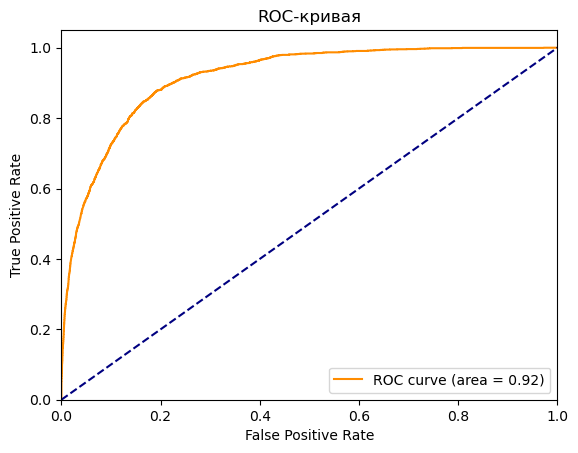

In [104]:
fpr, tpr, treshold = roc_curve(y_test, pos_param)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## XGBoosting

In [105]:
xgbc = XGBClassifier(n_jobs=-1)

In [110]:
param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 1],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100, 200, 300, 400, 500, 600, 700]
}

In [111]:
CV_xgb = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, n_jobs=-1)
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [113]:
CV_xgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 60}

In [114]:
xgb_best_param=XGBClassifier(learning_rate= 0.1, n_estimators=60, n_jobs=-1)

In [115]:
xgb_best_param.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
predictions_xgb = xgb_best_param.predict(X_test)
predictions_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
print("Precision:", precision_score(y_test, predictions_xgb))
print("Recall: ", recall_score(y_test, predictions_xgb))
print("Accuracy: ", accuracy_score(y_test, predictions_xgb))
print("F1-score: ", f1_score(y_test, predictions_xgb))
print("Log_loss: ", log_loss(y_test, predictions_xgb))

Precision: 0.6957295373665481
Recall:  0.37905962190984005
Accuracy:  0.922992977794648
F1-score:  0.4907436460621274
Log_loss:  2.659741295846516


In [118]:
roc_auc_score(y_test, xgb_best_param.predict_proba(X_test)[:,1])

0.917648253475777

In [119]:
predict_xgb = xgb_best_param.predict_proba(X_test)
pos_param_xgb = predict_xgb[:, 1]

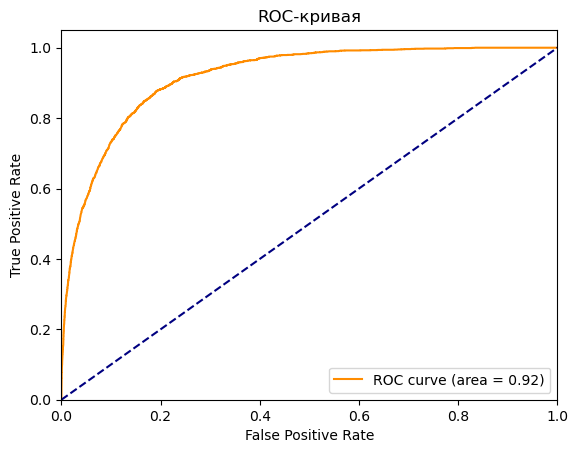

In [120]:
fpr, tpr, treshold = roc_curve(y_test, pos_param_xgb)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()